Names: Fong Ken Rui, Yuki Torigata, Sayana Imash

In [1]:
# your import statements
import numpy as np
import matplotlib.pyplot as plt

Consider a long hallway (length $L$) in an office building. If we assume that any
cigarette smoke mixes across the width of the hallway and vertically
through the depth of the hallway much faster than it mixes along the
hallway, we can write the diffusion of cigarette smoke as an equation
$$\frac {\partial S} {\partial t}
= \frac {\partial \kappa \partial S}{\partial x^2}$$
where $S$ is the concentration of smoke, $\kappa$ is the rate of diffusion of
smoke, t is the time and x is
distance along the hallway.  At the centre of the hallway is the smoker and here the smoke is 5 su (smoke units).  At one end of the hallway (x=0) is an open window, here the smoke is 0. At the other end of the hallway (x=L) is a closed window (no smoke through the closed window).

**Question 1**

Under what conditions can you move $\kappa$ outside the derivative?  Make that assumption here, and also make the steady state assumption.  What is your new differential equation?

If $\kappa$ is not a function of x, it can be moved outside the derivative.

The new differential equation is given by
$
\kappa \dfrac{\partial^2 S}{\partial x^2} = 0
$


**Question 2**

Using a centre-difference scheme, separating your hallway into $N=10$ divisions (so $N+1=11$ grid points) write down linear equations for the 1th to $N/2-1=4$th grid points and the $N/2+1=6$th to $N-1=9$th grid points. Note that the 0th and $N=10$th grid points are boundary points and there is a special condition at the $N/2=5$th grid point.

$
[S(x_0) -2 S(x_1) + S(x_2)] = 0
$

$
[S(x_1) -2 S(x_2) + S(x_3)] = 0
$

$
[S(x_2) -2 S(x_3) + S(x_4)] = 0
$

$
[S(x_3) -2 S(x_4) + S(x_5)] = 0
$

$
[S(x_5) -2 S(x_6) + S(x_7)] = 0
$

$
[S(x_6) -2 S(x_7) + S(x_8)] = 0
$

$
[S(x_7) -2 S(x_8) + S(x_9)] = 0
$

$
[S(x_8) -2 S(x_9) + S(x_{10)}] = 0
$


**Question 3**

What type of boundary condition is at $x=0$ (0th grid point)?  Write it as linear equation.

It is a Dirichlet boundary condition. 

$S(x_0) = 0$

**Question 4**

What type of boundary condition is at $x=L$ (N=10th grid point)?  Write it as linear equation.

It is a Neumann boundary condition. 

$S(x_{10}) - S(x_9) = 0$

**Question 5**

Consider the condition at the centre of the hallway ($x=L/2$, $N/2=5$th grid point) Write it as linear equation.

$
S(x_5) = 5
$

**Question 6**

Put all your equations into a matrix equation and solve the matrix equation.  Plot the solution.

In [2]:
stencil = np.array([1, -2, 1])
matrix = np.zeros((11, 11))

for i in range(1, 5):
    matrix[i, i-1:i+2] = stencil
for i in range(6, 10):
    matrix[i, i-1:i+2] = stencil

# Boundary conditions
matrix[0, 0] = 1
matrix[10, 9:11] = np.array([-1, 1])
matrix[5, 5] = 1

# Defining the image vector
vector = np.zeros(11)
vector[5] = 5

print(matrix)
print(vector)



[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  1.]]
[0. 0. 0. 0. 0. 5. 0. 0. 0. 0. 0.]


In [3]:
solution = np.linalg.solve(matrix, vector)

Text(0, 0.5, 'Smoke Units')

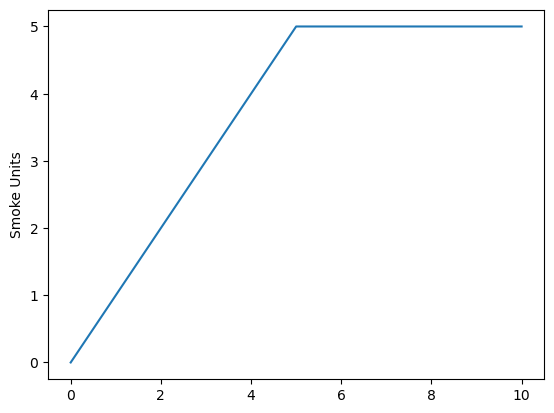

In [6]:
plt.plot(solution)
plt.ylabel("Smoke Units")